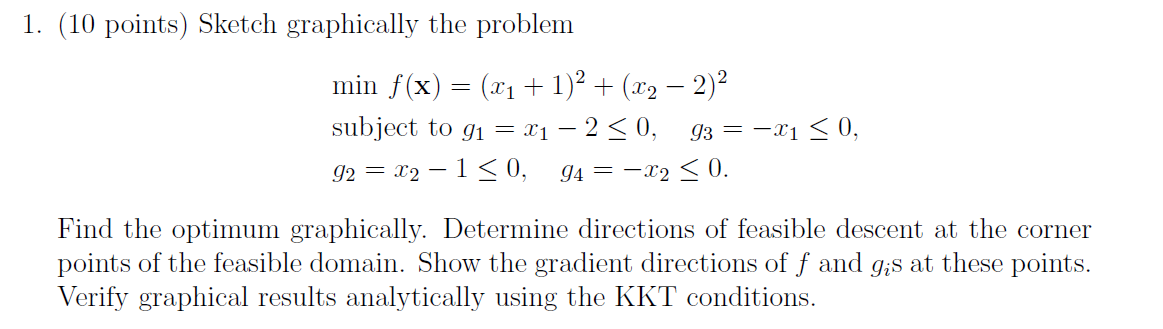

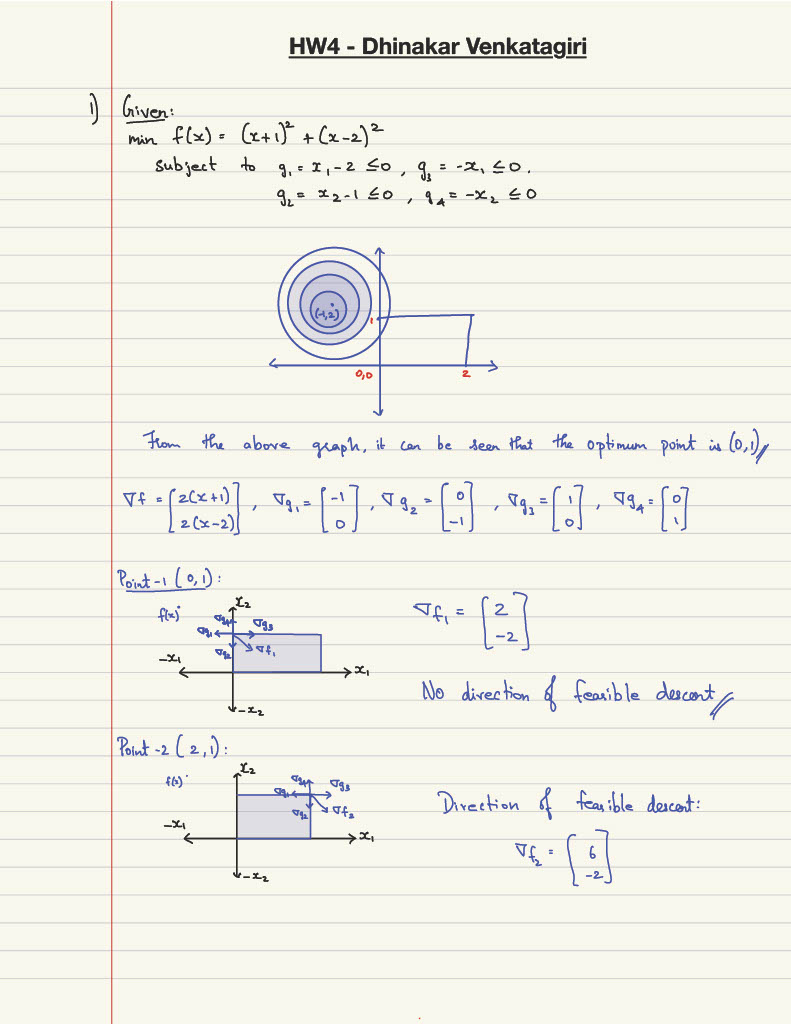

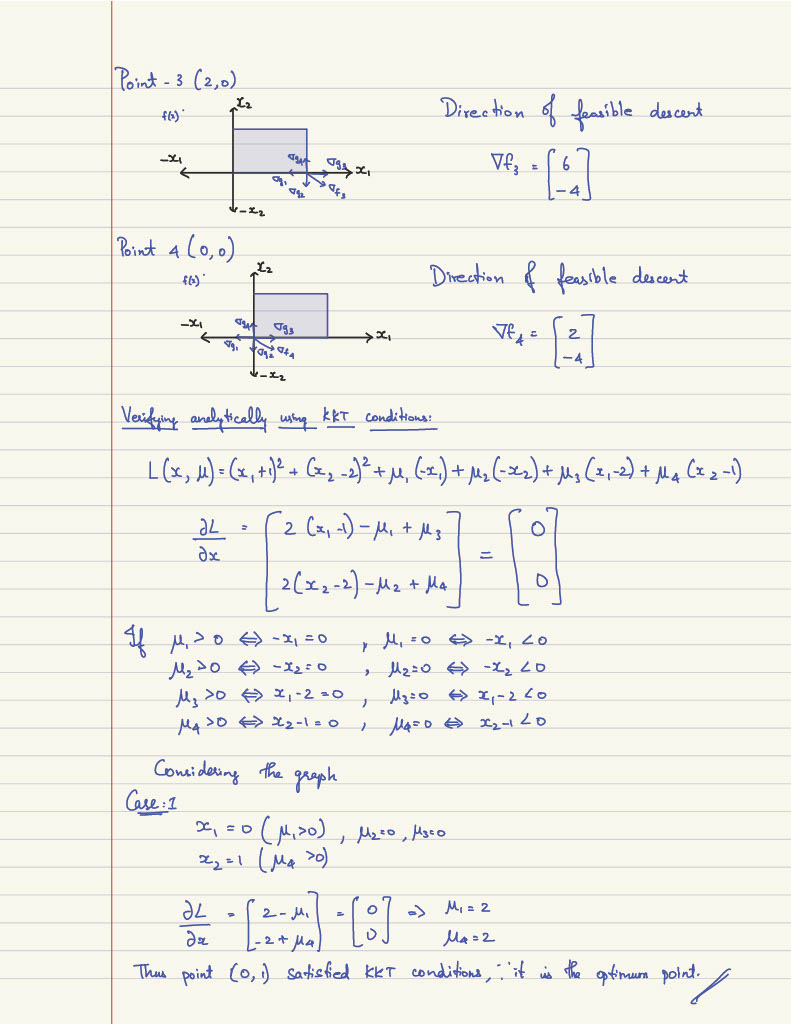

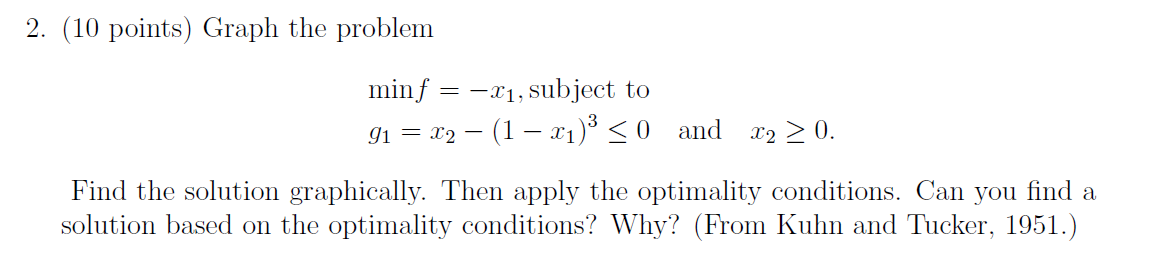

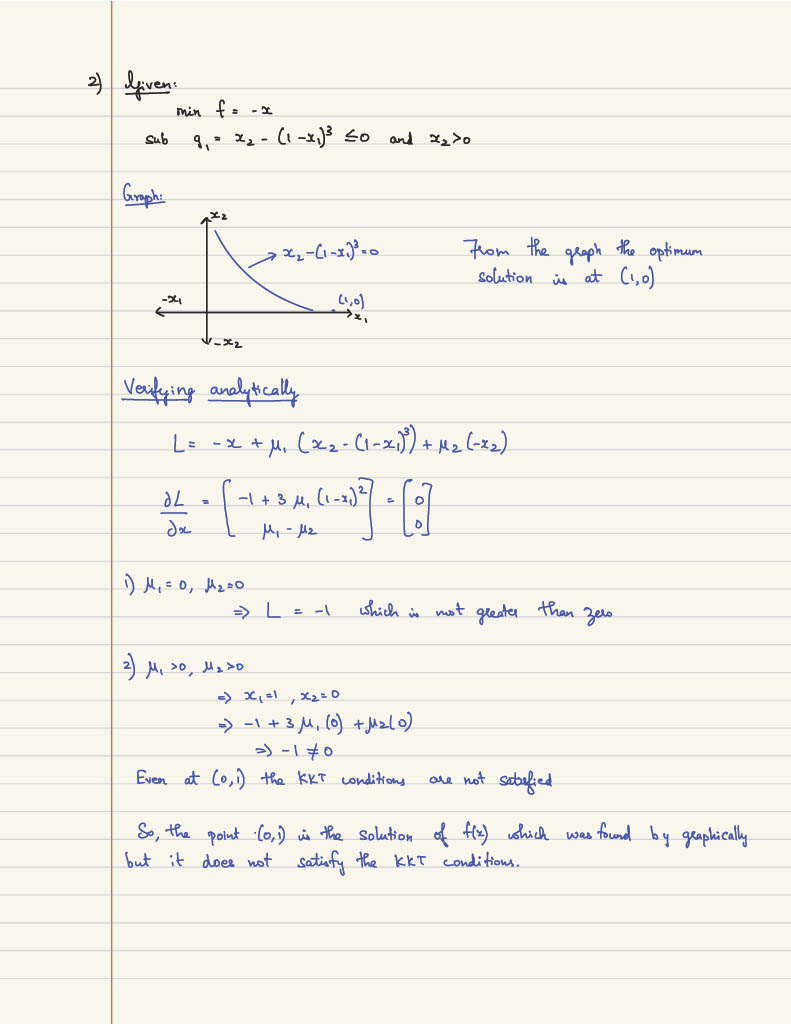

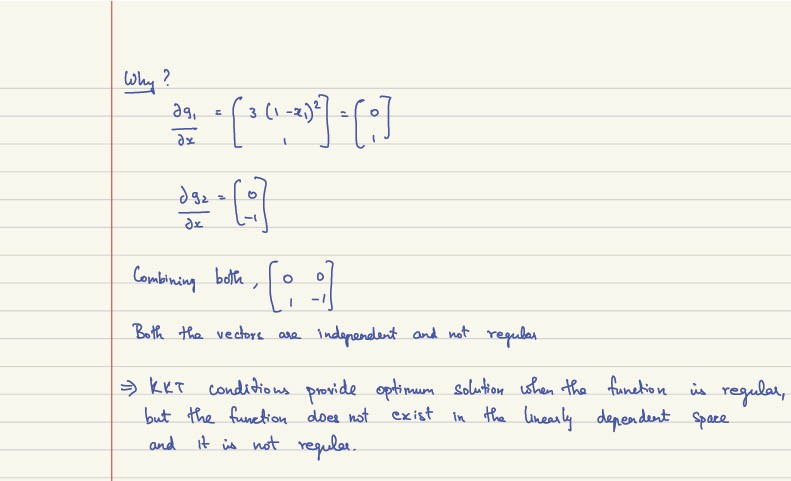

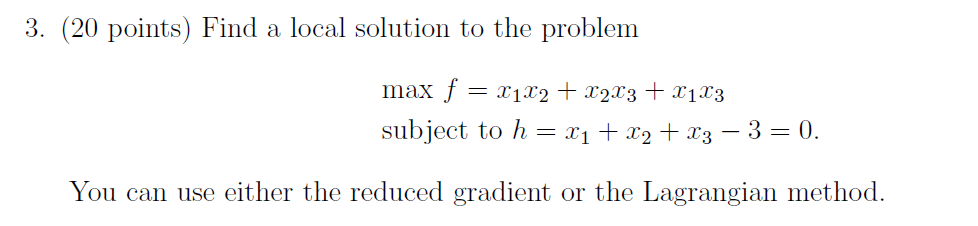

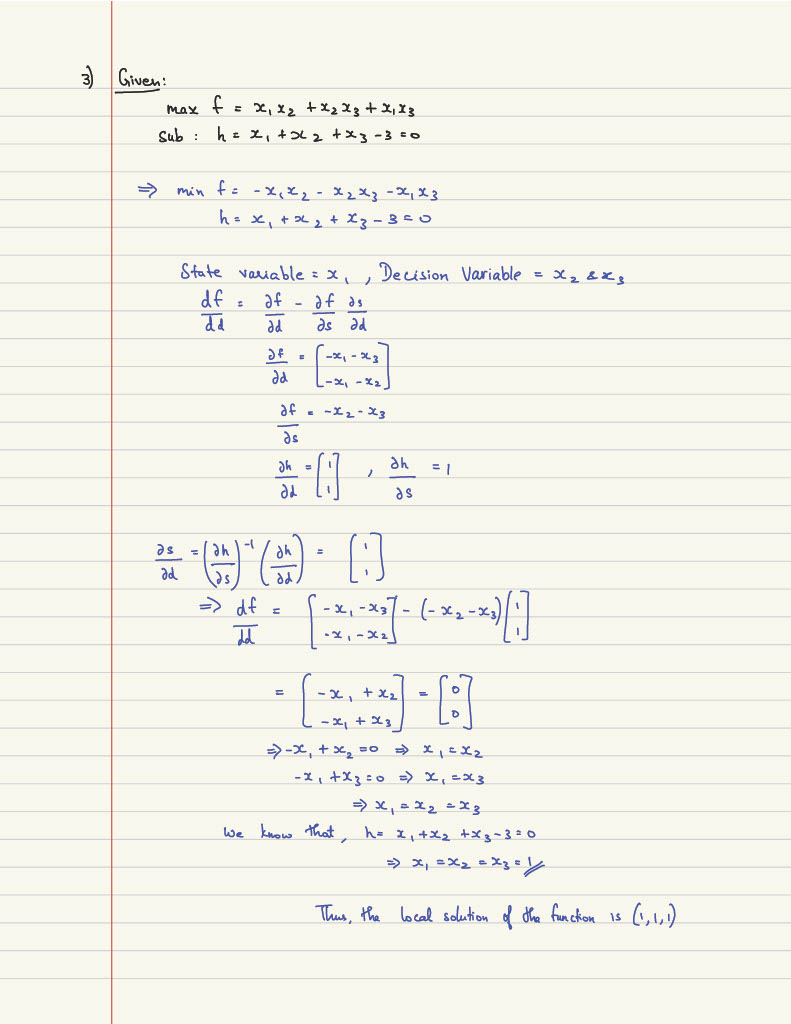

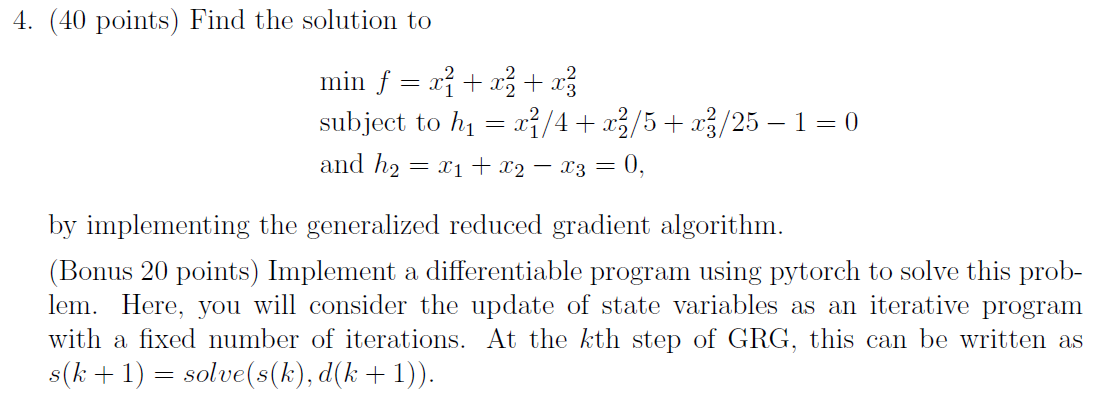

In [67]:
import numpy as np

def fun(x1, x2, x3):
    return x1**2 + x2**2 + x3**2

def subj(x1, x2, x3):
    out1 = x1**2/4 + x2**2/5 + x3**2/25-1
    out2 = x1 + x2 - x3
    return out1, out2

def dfdx(x1, x2, x3):
    dfdd = np.vstack((2*x2, 2*x3))
    dsds = np.array([2*x1], dtype=float)
    return dfdd, dsds

def dhdx(x1, x2, x3):
    dhds = np.vstack((np.hstack(((2/5)*x2, (2/25)*x3)), np.array([[1, -1]], dtype=float)))
    dhds_inv = np.linalg.inv(dhds)
    dhdd = np.vstack(((1/2)*x1, 1.))
    return dhds_inv, dhdd, dhds

def DfDd(x1, x2, x3):
    dfdd, dsds = dfdx(x1, x2, x3)
    dhds_inv, dhdd, _ = dhdx(x1, x2, x3)
    return dsds - np.matmul(dfdd.T, np.matmul(dhds_inv, dhdd))

def output(x1, x2, x3):
    err = 1e-3
    out1, out2 = subj(x1, x2, x3)
    out = np.vstack((out1, out2))
    out_n = np.linalg.norm(out)
    while out_n >= err:
        dhds_inv, _, dhds = dhdx(x1, x2, x3)
        Lambda = 1
        ds = np.matmul(dhds_inv, out)
        x2 = x2 - ds[0]
        x3 = x3 - ds[1]
        out1, out2 = subj(x1, x2, x3)
        out = np.vstack((out1, out2))
        out_n = np.linalg.norm(out)
    return x1, x2, x3, out_n

def search_step(x1, x2, x3):
    step = 1.
    df = DfDd(x1, x2, x3)
    search_obj = lambda step, x1, x2, x3, df: fun(x1, x2, x3) - step * 0.3 * np.matmul(df, df.T)
    def step_value(x1, x2, x3, step):
        df = DfDd(x1, x2, x3)
        dhds_inv, dhdd, _ = dhdx(x1, x2, x3)
        x1 = x1 - step * df.flatten()
        ds = np.matmul(np.matmul(dhds_inv, dhdd), df.T).flatten()
        x2 = x2 + step * ds[0]
        x3 = x3 + step * ds[1]
        return fun(x1, x2, x3)
    while search_obj(step, x1, x2, x3, df) < step_value(x1, x2, x3, step):
        step = 0.5 * step
        df = DfDd(x1, x2, x3)
    return step

epsillon = 1e-3
x1 = np.array([1.0], dtype=float)
x2 = np.array([2.0], dtype=float)
x3 = np.array([3.0], dtype=float)
iteration = 0
x1, x2, x3, _ = output(x1, x2, x3)
DfDd_norm = np.linalg.norm(DfDd(x1, x2, x3))
while DfDd_norm >= epsillon:
    step = search_step(x1, x2, x3)
    x1 = x1 - step * DfDd(x1, x2, x3).flatten()
    dhds_inv, dhdd, dhds = dhdx(x1, x2, x3)
    ds = step * np.matmul(np.matmul(dhds_inv, dhdd), DfDd(x1, x2, x3).T).flatten()
    x2 = x2 + ds[0]
    x3 = x3 + ds[1]
    x1, x2, x3, _ = output(x1, x2, x3)
    DfDd_norm = np.linalg.norm(DfDd(x1, x2, x3))

print('The solution is:\nX1 = {:.8f} \nX2 = {:.8f} \nX3 = {:.8f}'.format(x1[0], x2[0], x3[0]))


The solution is:
X1 = -1.57329303 
X2 = 1.37727404 
X3 = -0.19659334


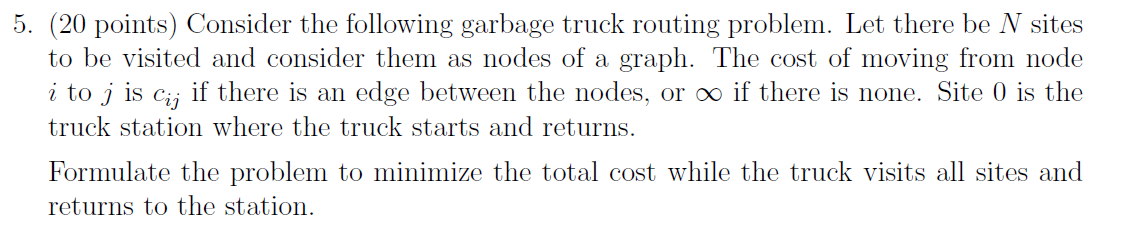

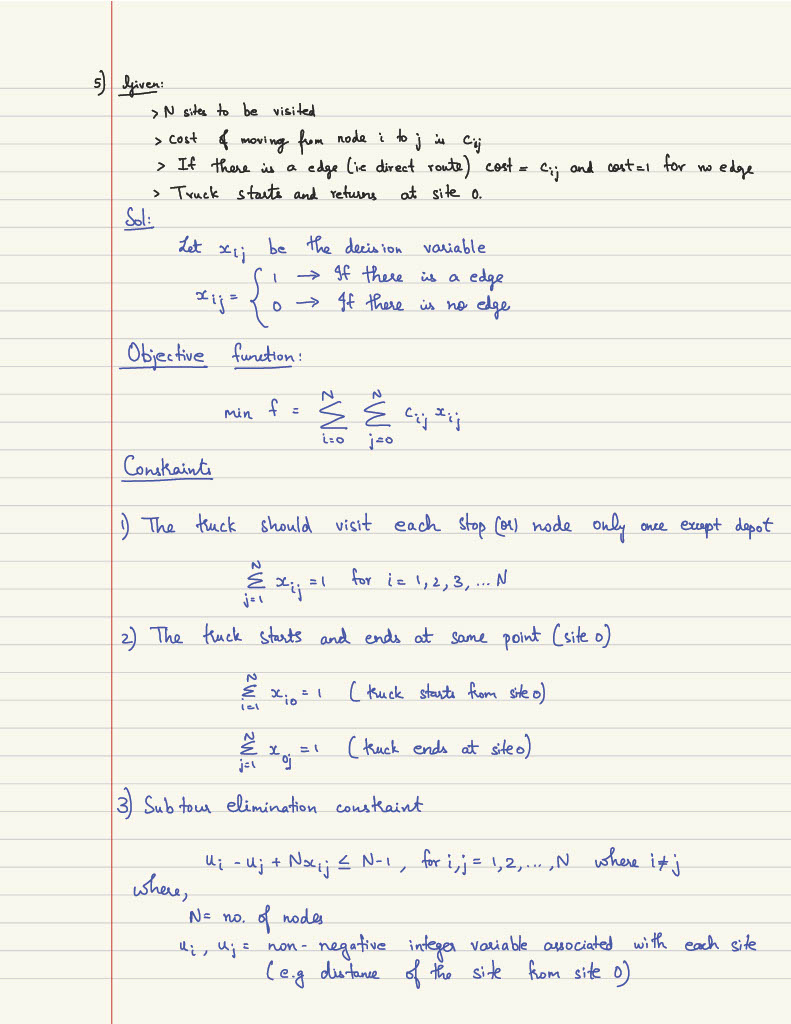